## Importing packages
If you are working with a notebook, it is a good practice to import all the packages that you need at the top of the notebook. This will automatically give you a rough idea of what the notebook is about, and you will avoid random package imports throughout the notebook.

- Import the three packages you have used so far with their correct renaming conventions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the passwords again
Load the passwords from a file of your choice again. You can copy the function from yesterdays notebook if you don't want to implement it again. As before, the passwords in the list should be preprocessed (newline characters removed) and filtered (empty passwords removed).

In [2]:
def load_passwords(path):
    # start with an empty list
    passwords = []
    # open the file
    with open(path) as f:
        # iterate over the lines in the file
        for line in f.readlines():
            # remove the newline character
            password = line.strip()
            # append non-empty passwords to the list
            if password:
                passwords.append(password)
    # return the list of passwords
    return passwords

In [3]:
passwords = load_passwords("0001.txt")

## Counting the unique passwords again
In the previous notebook you used the function `np.unique()` from the NumPy package with the argument `return_counts=True` to find the unique passwords and their counts. This is already quite convenient, but there is an even quicker way using the package pandas. Besides the `pd.DataFrame()`, there is also the `pd.Series()` which works like a single column of a data frame. A series consists of one data column and a corresponding index. You can think of it as a hybrid of an array and a dictionary, but compared to a dictionary the series is suited for numerical data.

- Pass the list of passwords to `pd.Series()` to create a series from the password data. How can you access the first/last ten passwords from the series?
- Use the series method `.value_counts()` to get a new series with the unique passwords and the counts. Since the series is already sorted by the counts, you can directly look at the most frequent passwords from the dataset again. If you are using 10 million passwords, this will take a few seconds.
- Since you want to assign more values to the unique passwords in the next exercises, you need to upgrade the series to a data frame by passing it to the function `pd.DataFrame()`.

In [4]:
# create a series from the passwords and look at the last ten data points
password_series = pd.Series(passwords)
password_series[-10:]

999841     123456789
999842      keqilexa
999843      qwerty10
999844     19691974d
999845       babycat
999846     1974irina
999847    1974sombel
999848    vr19781974
999849     rajib1974
999850     raj270207
dtype: object

In [5]:
# get the series of unique passwords with the counts
unique_passwords = password_series.value_counts()
unique_passwords

123456       18637
111111        6993
123456789     6579
123123        2731
000000        2288
             ...  
www123141        1
A76886           1
352358908        1
jokefirst        1
raj270207        1
Name: count, Length: 739024, dtype: int64

In [6]:
# create the data frame
df = pd.DataFrame(unique_passwords)

## Accessing rows in the data frame
Compared to the data frame from yesterdays notebook, the passwords are now the index column. Since the passwords are the unique identifier of each row in the data frame, this approach is better than having a numerical index counting from `0`. You can use a password to directly read the corresponding row from the data frame. If the name of your data frame is `df`, the following code snippet will return the row of the password `"123456"` (if it exists):
```python
df.loc["123456"]
```
Even though the passwords are now the index of the data frame, you can still use a numerical index to read rows from the data frame. The corresponding property of the data frame is called `.iloc`. See the following code snippet that will select the 10th row from the data frame (regardless of the actual value of the index column):
```python
df.iloc[9]
```
Instead of a single index, you can also use this with an index range to get multiple rows of the data frame.

- Read a few passwords from the data frame. If you are not feeling creative, you can just try `"hello"`, `"test"` and `"111111"`.
- Use the property `df.iloc` to read the first/last 20 passwords from the data frame. How can you reverse the data frame using the property `.iloc`?

In [7]:
# reproduce the code snippet from the exercise
df.loc["123456"]

count    18637
Name: 123456, dtype: int64

In [8]:
# look at a few other passwords
df.loc["hello"], df.loc["test"], df.loc["111111"]

(count    29
 Name: hello, dtype: int64,
 count    47
 Name: test, dtype: int64,
 count    6993
 Name: 111111, dtype: int64)

In [9]:
# use the numerical index to get rows from the data frame
df.iloc[:20]

,count
123456,18637
111111,6993
123456789,6579
123123,2731
000000,2288
qwertyuiop,1564
123123123,1519
11111,1408
121212,1402
222222,1380


In [10]:
# reverse the data frame with the index [::-1]
df.iloc[::-1]

,count
raj270207,1
jokefirst,1
352358908,1
A76886,1
www123141,1
...,...
000000,2288
123123,2731
123456789,6579
111111,6993


## Accessing columns in the data frame
Regarding the columns a data frame works just like a dictionary. The key is the column name and the value will be the data saved in the column. You can use this to read existing columns from the data frame, and you can also use this to assign new columns to the data frame. See the following code snippet to get the column `"length"` from the data frame `df`:
```python
length_series = df["length"]
```
When you read a single column from a data frame, the column will be returned as a series. Instead of a single column name, you can also index the data frame with a list of column names. In that case, the returned variable is a data frame.

- Compute the array of lengths by iterating over the passwords in `df.index`. Assign the array to the data frame with the column name `"length"`.
- Plot the count of the unique passwords as a function of the length in a scatter plot. If you are using the dataset with 10 million passwords, this will take a while.

In [11]:
# iterate over the passwords in the index and assign the lengths array to the data frame
lengths = np.array([len(password) for password in df.index])
df["length"] = lengths

<Axes: xlabel='length', ylabel='count'>

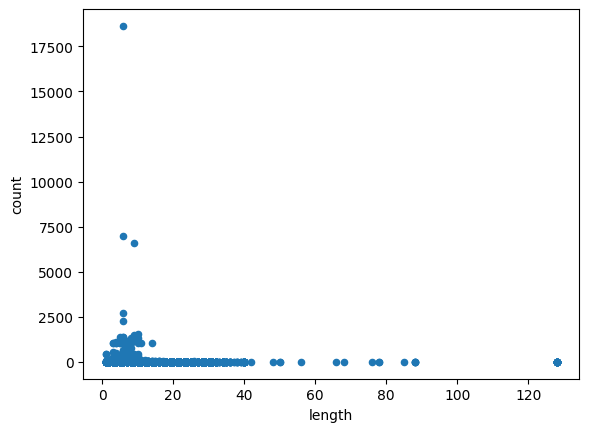

In [12]:
df.plot("length", "count", kind="scatter")

## Sorting and querying the data frame
Since the index and the columns in the data frame are aligned, you can directly sort the entire data frame based on the values of one (or mulitple) column(s). The corresponding method `df.sort_values()` returns a sorted copy of data frame `df`, and you can decide the order with the boolean argument `ascending`. If you want to keep the sorted data frame, you have to overwrite the existing one or create a new variable. See the following code snippet that returns the data frame sorted by the `"length"` in descending order:
```python
df.sort_values("length", ascending=False)
```

In a data frame you can use a so-called query to select specific rows from the data frame. The data frame method `.query()` takes a string argument with one (or multiple) filter condition(s) and returns the reduced data frame. As an example, see the following code snippet that will return all rows where the length of the password is greater than 10:
```python
df.query("length > 10")
```
You can combine multiple conditions with `and`/`or` or the characters `&`/`|`. If you want to create more complex conditions, you can also use parentheses to group the conditions.

- Try a few different queries with the comparison operators `==`, `<=`, `>` and `!=` to get used to the method. 
- Use the query method to get all passwords with a length equal to 6 that occur between 5 and 9 times (including 5 and 9) in the data frame.
- Combine the query and the sorting to find the 10 longest passwords that occur at least twice in the dataset. You can "stack" the methods and write everything in a single line of code.

In [13]:
# get the rows where the count is unequal to 2
df.query("count != 2")

,count,length
123456,18637,6
111111,6993,6
123456789,6579,9
123123,2731,6
000000,2288,6
...,...,...
www123141,1,9
A76886,1,6
352358908,1,9
jokefirst,1,9


In [14]:
# get the rows where the length is greater than 50, there are some really weird passwords here...
df.query("length > 50")

,count,length
df6017dd257e11ae8882143ae2489f599f954021b984eb218c885fb9bf772705bd6621caeb9289a769daaa6feace610edf86d3531ee545bdabaa5178519ff02a,1,128
f093e5f7e984b5b66d8ecafa9f763fa4211f63d25a82cdbdda7b6af87a839d6e39749164ae9a5a7e238e2abef37480b47393ab0875dd5aa8e722efd800d12aa5,1,128
eefb969f7b69a3c4e2fe12d4ea37ea38a06f49827c6b121f666fc3aace8e5b0273993e00aa0c2df88657b9959a0b2c02a3e739d426482c2d1fd1277618c89fb4,1,128
galt:gv-ra256:87.239.82.118:47b1f232ed78d4bc69548c4aa6f1636074d73bdd,1,68
otudurnas:gt-bang-256:87.239.82.118:85a033c5a759b7bf825b6d165ef4817bdcc3f723,1,76
da14e68e5c3701bf6a19ae05ebe0367860177ca03eec20c7f7854b670ce88ca27497a741d548453fcba9824608ab128b276de60b0fb505f1875970fbf310100c,1,128
0b1c76a6b676544e71c305b2f7f98a9692a0799f924795293ec8aa0648386224285c8d70b92492536e3409244c02f92a91bb9a613b95959c34c99e920aa96c00,1,128
cc18427d86d00050caf216ed3ca9b350b61faa01fdafc6888fec85ffc6749252a71f07a9d890ef44ec2ec30f,1,88
a1270ac76125ff8e5ea8f42fc4daaec1bd8d9d0a5ea22ae81fb6daaef0d379474d3545d3623ca68e5ef50de6181d0585380ed149dfeb3441f537e86f080cbad5,1,128
a6c8ffd085d4b194d8f9412bf90940f5e39b4a945261be6e0e3cdfeb3d95e3de2177054d8a03b6bf6e591b2ba01a53d60bdb52e20b861ea9c638303908eb853f,1,128


In [15]:
# use a combined query with the keyword "and"
df.query("length == 6 and (5 <= count <= 10)")

,count,length
dsd998,10,6
12345p,10,6
552200,10,6
albert,10,6
jessie,10,6
...,...,...
214214,5,6
654987,5,6
skippy,5,6
hateaa,5,6


In [16]:
# first apply the query to reduce the data frame to count > 1, then sort everything by the length and select the first ten passwords
df.query("count > 1").sort_values("length", ascending=False).iloc[:10]

,count,length
02e9f97b747bfca4ec2d50b9026119aaf2f77614,2,40
6006d2e489acac72b01fe81ecd8a519015e39a45,2,40
6a14b05e4c239b437606e223fb071e24f5bb3147,2,40
111111111111111111111111111111111111111,2,39
chuylizarragaysubandatierrasinaloense,2,37
6d9ff949640422493f3db836c3035c64,2,32
5d6a6b15c6a645c86abeadbb62e6940c,2,32
b0f8b3e58f093359fe1af416b5ea8ed6,2,32
e10adc3949ba59abbe56e057f20f883e,5,32
5a25e86cd45c68ef03fda1cd00296a72,2,32


## Computing more password metrics
Besides the count and the length of each password, it would be nice to have some more data for each password. In the previous notebooks you already worked with the digit sum that computes the sum of all digits in each password. Two more interesting values of passwords are the count of alphabetic characters and numeric characters. To compute these values, you just have to count the characters of the respective categories. See the following example password with an alphabetic character count of `4` and a numeric character count of `2`:
```python
password = "stop12!?"
```

- Compute the digit sum for each password in the `df.index` and assign the array as a new column to the data frame. You can reuse the function from the previous notebook.
- Write two functions to count the alphabetic characters and numeric characters of a single password. Use this function to calculate the two values for all passwords, and assign them to the data frame as new columns.
- Display the digit sum as a function of the numeric character count and as a function of the alphabetic character count. Can you already spot some correlation in the data?
- EXTRA: Implement the function to count the special characters and also add the number of special characters as a new column to the data frame. 

In [17]:
def compute_digit_sum(password):
    digit_sum = 0
    for char in password:
        if char.isnumeric():
            digit_sum += int(char)
    return digit_sum

In [18]:
# only implement the functions to get the lists of alphabetic characters since you can easily compute their lengths with the function len()
def get_alphabetic_characters(password):
    return [character for character in password if character.isalpha()]

def get_numeric_characters(password):
    return [int(character) for character in password if character.isnumeric()]

In [19]:
# compute the digit sum and assign it as a new column
digit_sum = np.array([compute_digit_sum(password) for password in df.index])
df["digit_sum"] = digit_sum

In [20]:
# count the alphabetic characters and numeric characters
n_alphabetic = np.array([len(get_alphabetic_characters(password)) for password in df.index])
n_numeric = np.array([len(get_numeric_characters(password)) for password in df.index])
df["n_alphabetic"] = n_alphabetic
df["n_numeric"] = n_numeric

<Axes: xlabel='n_numeric', ylabel='digit_sum'>

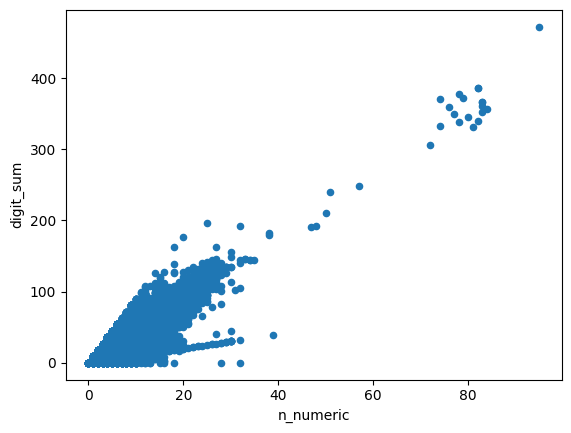

In [21]:
# the digit sum will be greater with an increasing count of numeric characters
df.plot("n_numeric", "digit_sum", kind="scatter")

<Axes: xlabel='n_alphabetic', ylabel='digit_sum'>

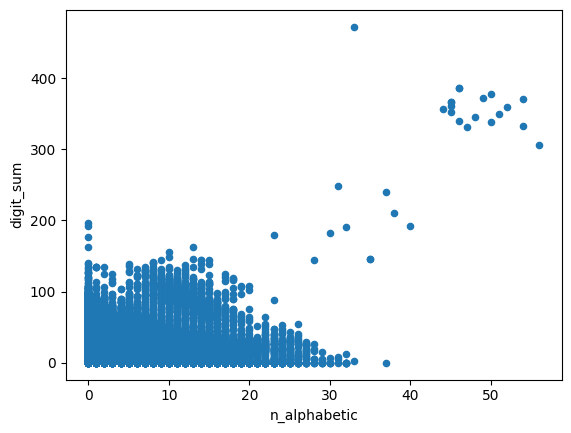

In [22]:
# the digit sum appears to be anticorrelated to the alphabetic character count
# this makes sense if you consider that alphabetic characters are taking away the "character space" from numeric characters in the passwords
df.plot("n_alphabetic", "digit_sum", kind="scatter")

## Statistics on data frame columns
If your data frame only contains numerical data, you can directly use the data frame methods `.sum()`, `.min()`, `.max()`, `.mean()` etc. to run these computations. The result will be a dictionary-like variable where the keys are the names of the columns and the values are the results of the computations. You can also run the same methods on a series to immediately get a single return value.  

Besides computations on single columns, you can also compute correlations across the data frame columns. The corresponding method `.corr()` will return a new data frame with the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between all the columns. If the coefficient is > 0, the two columns are positively correlated, and if the coefficient is < 0, the two columns are negatively correlated. The maximum correlations are reached at +1 and -1 respectively. Note that the Pearson correlation coefficient is only the default option of the method `.corr()`, there are also other correlation coefficients available and you can even compute your own correlation coefficient.

- Try the computational methods on the entire data frame. Do the unique passwords contain more alphabetic characters or numeric characters on average?
- Use the methods `.idxmax()` and `.idxmin()` to get the passwords (which are the indices of the data frame) for the maximum/minimum value of each column.
- Compute the Pearson correlation coefficient across all the columns in the data frame. Look at the individual coefficients, are any of them surprising to you?
- Plot the alphabetic character count as a function of the numeric character count. Can you see the strongly negative correlation in the data?

In [23]:
# calculate the sum of all columns, this will for example give you the total sum of all digits
df.sum()

count             999851
length           6769546
digit_sum       14944438
n_alphabetic     2924310
n_numeric        3794175
dtype: int64

In [24]:
# on average, there are more numeric characters than alphabetic characters in the unique passwords
df.mean()

count            1.352934
length           9.160117
digit_sum       20.221857
n_alphabetic     3.956989
n_numeric        5.134035
dtype: float64

In [25]:
# apart from the count, the passwords with the maximum values are some really weird ones...
df.idxmax()

count                                                      123456
length          df6017dd257e11ae8882143ae2489f599f954021b984eb...
digit_sum       0b1c76a6b676544e71c305b2f7f98a9692a0799f924795...
n_alphabetic    a1270ac76125ff8e5ea8f42fc4daaec1bd8d9d0a5ea22a...
n_numeric       0b1c76a6b676544e71c305b2f7f98a9692a0799f924795...
dtype: object

In [26]:
# the minimum values are not really well defined since there are many passwords with the count 1 or the length 1, looking at just a single password is not really useful
df.idxmin()

count              mixi521
length                   0
digit_sum           000000
n_alphabetic        123456
n_numeric       qwertyuiop
dtype: object

In [27]:
# the digit sum has a small positive correlation with the length, but a strong positive correlation with the number of numeric characters
# the number of alphabetic characters shows a negative correlation on the digit sum and the number of numeric characters
df.corr()

,count,length,digit_sum,n_alphabetic,n_numeric
count,1.000000,-0.008451,-0.004161,-0.003404,-0.002931
length,-0.008451,1.000000,0.304286,0.391059,0.353614
digit_sum,-0.004161,0.304286,1.000000,-0.647633,0.892483
n_alphabetic,-0.003404,0.391059,-0.647633,1.000000,-0.716774
n_numeric,-0.002931,0.353614,0.892483,-0.716774,1.000000


<Axes: xlabel='n_numeric', ylabel='n_alphabetic'>

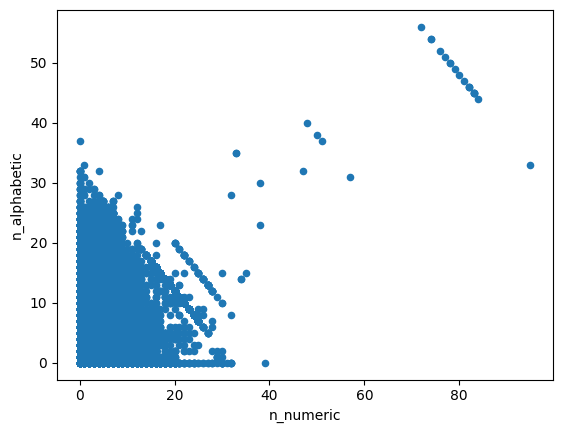

In [28]:
# the negative correlation is clearly visible between the numeric characters and the alphabetic characters
df.plot("n_numeric", "n_alphabetic", kind="scatter")

## Creating multiple plots in one figure
So far you have only used the functions `plt.plot()`, `plt.bar()` etc. that automatically create a figure with a single plot (which is also called axis). The Jupyter environment will automatically call the function `plt.show()` for you at the end of the cell that will actually display the figure/plot.  

If you want to have multiple plots/axes in one figure, you have to define the shape of the figure beforehand. The corresponding function in matplotlib is `plt.subplots()` where you can specify how many rows and columns of axes you want to have in the figure. If you want to create three axes in a row, you can use the following code snippet:
```python
fig, axs = plt.subplots(ncols=3)
```
The function will return a figure and an array of axes and they will be automatically displayed if you execute the cell. Instead of calling `plt.plot()`, you can now plot something in a specific axes by calling `axs[0].plot()`. The other arguments will be the same, you can use the x-values, the y-data and some styling just like before. See the following code snippet that will create two axes with different linear functions:
```python
fig, axs = plt.subplots(ncols=2)
axs[0].plot(np.arange(10))
axs[1].plot(-np.arange(40))
```

If you want to plot something directly from a data frame, you have to tell the data frame method which axes you want to use. For example, if you want to plot the digit sum (in the column `"digit_sum"`) as a function of the number of alphabetic characters (in the column `"n_alphabetic"`) in the second axes of the figure, you can use the following code snippet:
```python
fig, axs = plt.subplots(ncols=3)
df.plot("n_alphabetic", "digit_sum", kind="scatter", ax=axs[1])
```
If you want to change the overall size of the figure, you can pass a list with the width and the height to the parameter `figsize` of the function `plt.subplots()`. As an example, see the following code snippet will return a very wide figure with two axes:
```python
fig, axs = plt.subplots(ncols=2, figsize=[20, 4])
```
To save your figure at the end of the cell, you can use the method `fig.savefig()` with the name of the figure. See the following code snippet to create a new figure with three empty axes, and to save it with the name `"plot.png"` at the end of the cell:
```python
fig, axs = plt.subplots(ncols=3)
fig.savefig("plot.png")
```

- Create a new figure with three empty axes in one column. If you do not like the aspect ratio, use the parameter `figsize` to change the size of the figure.
- Create a new figure with two axes in one row. Show the digit sum as a function of the password length in the first axes, and show the digit sum as a function of the number of numeric characters in the second axes. In both axes, display the maximum possible digit sum. Assign labels to all the data and add a legend.
- Create a new figure with two axes in one row. Display different columns from the data frame in the two axes. Save the figure and open the file on your own device.
- EXTRA: Create a figure with 4 axes in 2 rows. How do you have to index the `axs` to select the individual plots? Fill the axes with some data from the data frame. Call `fig.set_tight_layout(True)` if the axes are overlapping with the labels.

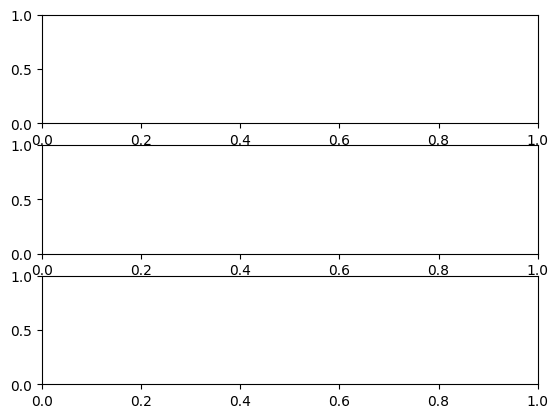

In [33]:
# by specifying nrows=3, you will receive three equally sized axes in a column
fig, axs = plt.subplots(nrows=3)

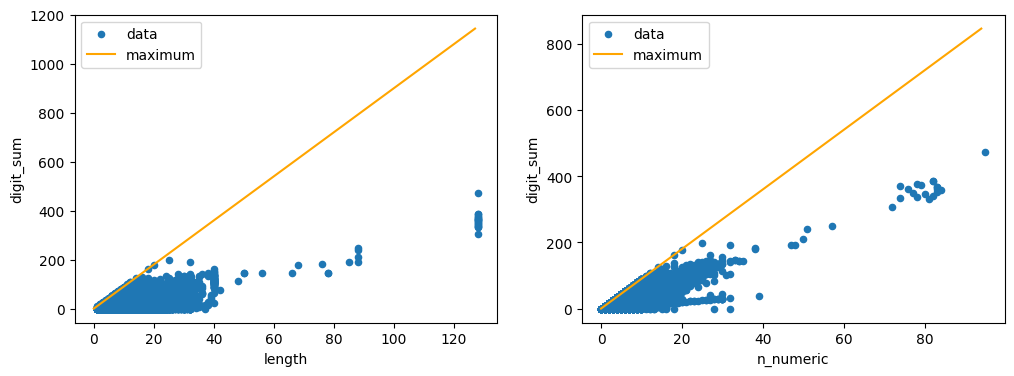

In [38]:
fig, axs = plt.subplots(ncols=2, figsize=[12, 4])

# plot the digit sum as a function of the length in the first axes
df.plot("length", "digit_sum", kind="scatter", ax=axs[0], label="data")
axs[0].plot(9*np.arange(df["length"].max()), label="maximum", color="orange")
axs[0].legend()

# plot the digit sum as a function of the length in the second axes
df.plot("n_numeric", "digit_sum", kind="scatter", ax=axs[1], label="data")
axs[1].plot(9*np.arange(df["n_numeric"].max()), label="maximum", color="orange")
axs[1].legend()

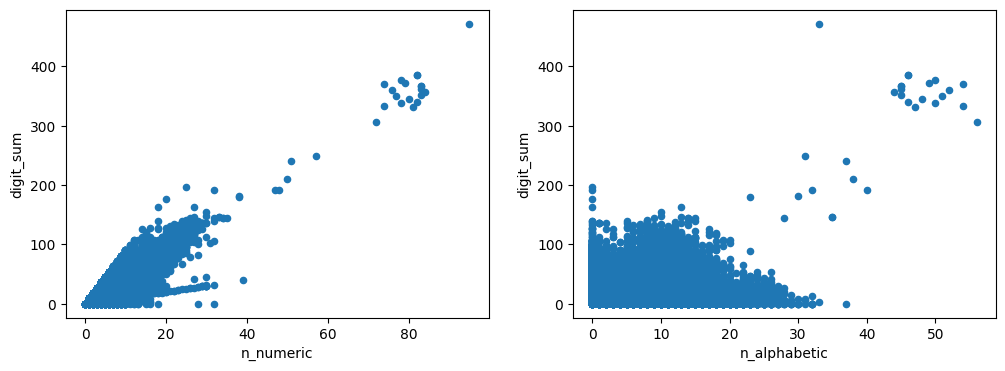

In [32]:
# display some data from the data frame in the two axes
fig, axs = plt.subplots(ncols=2, figsize=[12, 4])
df.plot("n_numeric", "digit_sum", kind="scatter", ax=axs[0])
df.plot("n_alphabetic", "digit_sum", kind="scatter", ax=axs[1])
fig.savefig("plot.png")

<Axes: xlabel='n_alphabetic', ylabel='length'>

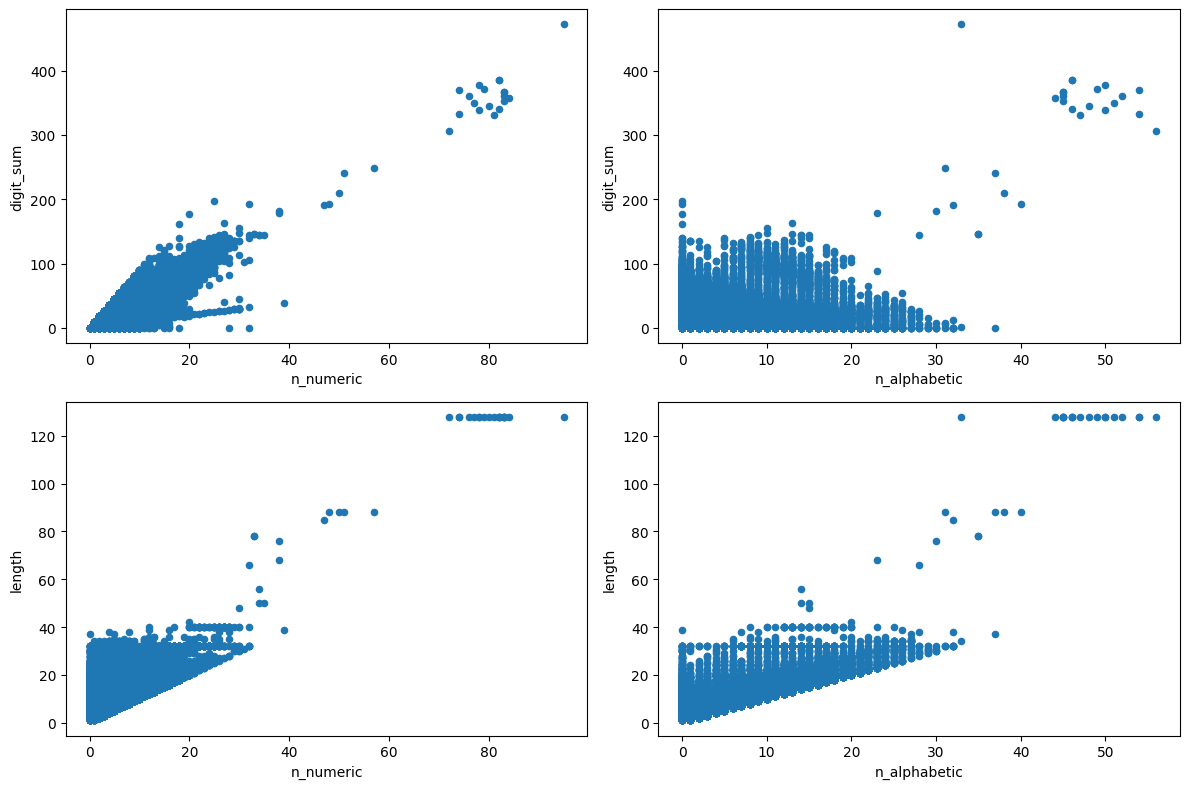

In [39]:
# you can select the separate axes with a row index and a column index, axs[0,1] will be the second axes in the first row
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.set_tight_layout(True)
df.plot("n_numeric", "digit_sum", kind="scatter", ax=axs[0,0])
df.plot("n_alphabetic", "digit_sum", kind="scatter", ax=axs[0,1])
df.plot("n_numeric", "length", kind="scatter", ax=axs[1,0])
df.plot("n_alphabetic", "length", kind="scatter", ax=axs[1,1])

## Changing axes labels and titles
When you create a figure and axes with the function `plt.subplots()`, you can no longer change the labels and the title of each axes with the functions `plt.xlabel()` etc. Instead, you have to use methods of the specific axes to change these properties. The methods for the xlabel, the ylabel and the title are called `.set_xlabel()`, `.set_ylabel()` and `set_title()`, and they each take a string parameter that will be the label/title. As an example, see the following code snippet that creates two axes with some labels and a title:
```python
fig, axs = plt.subplots(ncols=2)
axs[0].set_title("Plot 1")
axs[1].set_title("Plot 2")
axs[0].set_xlabel("lengths")
axs[1].set_xlabel("digit sum")
axs[0].set_ylabel("count")
axs[1].set_ylabel("count")
```

- Reproduce all plots from the previous exercise without using the data frame method `.plot()`. Instead, get the columns that you want to use in the plot from the data frame, and use the axes methods `.plot()`, `.scatter()`, etc. Make sure that you add all xlabels and ylabels, just like the data frame method would do for you automatically. And in addition to the xlabels and ylabels, add a title to each axes that describes the content of the axes.